In [28]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import constants as const
from connectivity.constants import Dirs
from connectivity.savio_scripts import script_ridge_mk as run


# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [ ]:
# train and validate ridge model(s)

resolution = 'tesselsWB162'

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in ['sc1', 'sc2']:
    run.train_ridge(log_alpha=[0,2,4,6,8,10], 
                    resolution=resolution, 
                    subj_id=train_subjs, 
                    train_exp=exp)


In [27]:
# evaluate ridge model(s)

resolution = 'tesselsWB162'

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in range(2):
    run.eval_ridge(log_alpha=[0,2,4,6,8,10], 
                   resolution=resolution, 
                   subj_id=train_subjs, 
                   train_exp=f'sc{2-exp}', 
                   eval_exp=f'sc{exp+1}')
    

In [173]:
# load summary of the train, eval model(s)

df_train = run.train_summary()
df_eval = run.eval_summary()

df = run.merge_summary(train_summary=df_train, 
                       eval_summary=df_eval)
 

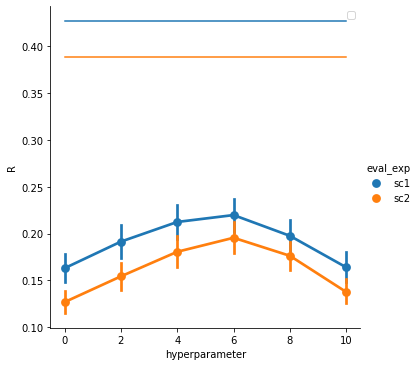

In [178]:
# plot model predictions

df['noiseceiling_Y'] = np.sqrt(df.noise_Y_R)
df['noiseceiling_XY'] = np.sqrt(df.noise_Y_R)*np.sqrt(df.noise_X_R)

# R
sns.factorplot(x='hyperparameter', y='R', hue='eval_exp', data=df)

# independent noise ceiling
sns.lineplot(x='hyperparameter', y='noiseceiling_Y', hue='eval_exp', data=df, ci=None);
plt.legend({})

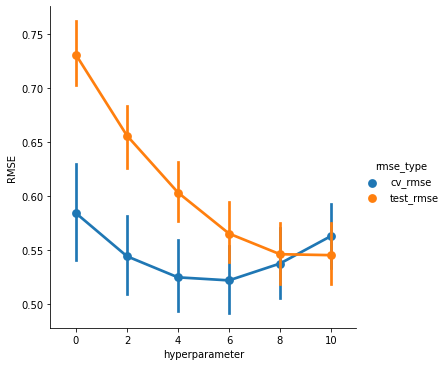

In [176]:
# plot model RMSE

sns.factorplot(x='hyperparameter', y='RMSE', hue='rmse_type', data=df.query('rmse_type!="train_rmse"'))

Text(0.5, 1.0, 'Train on sc2 and eval on sc1')

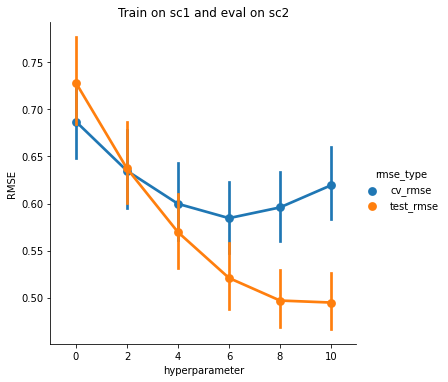

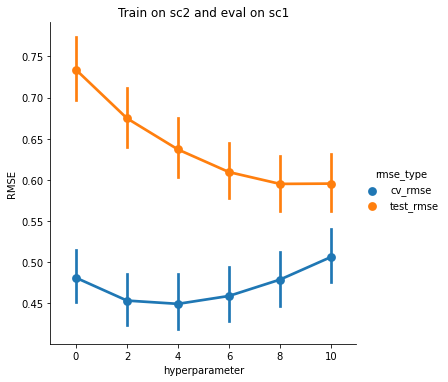

In [175]:
# plot model RMSE

sns.factorplot(x='hyperparameter', y='RMSE', hue='rmse_type', data=df.query('train_exp=="sc1" and eval_exp=="sc2" and rmse_type!="train_rmse"'))
plt.title(f'Train on sc1 and eval on sc2')

sns.factorplot(x='hyperparameter', y='RMSE', hue='rmse_type', data=df.query('train_exp=="sc2" and eval_exp=="sc1" and rmse_type!="train_rmse"'))
plt.title(f'Train on sc2 and eval on sc1')